### Самостоятельная работа по теме: Кластеризация

В примерах, встречающихся в интернете, в литературе, часто используется следующая терминология: 
- `Feature (Особенности)`: входная переменная, используемая для создания прогнозов.
- `Predictions (Прогнозы)`: выходные данные модели при наличии входного примера.
- `Example (Пример)`: строка набора данных. Пример обычно содержит один или несколько объектов.
- `Label (Метки)`: результат функции

Воспользуемся классическим набором данных ирисов Фишера. Датасет представляет набор из 150 записей с четырьмя атрибутами в следующем порядке: 
- длина чашелистика (sepal length) 
- ширина чашелистика (sepal width) 
- длина лепестка (petal length)
- ширина лепестка (petal width)

и три класса: 
- 1) Iris Setosa (класс - 0) 
- 2) Iris Versicolor (класс - 1) 
- 3) Iris Virginica (класс - 2) 

Для решения задач кластеризации данных используется библиотека `scikit-learn` для загрузки и обработки набора данных и библиотека `matplotlib` для визуализации. Ниже представлен программный код для исследования исходного набора данных.

In [1]:
# Импортируем библиотеки
from sklearn import datasets #обратите внимание, импорт части библиотеки
import matplotlib.pyplot as plt

# Загружаем набор данных
iris_df = datasets.load_iris() 

# Методы, доступные для набора данных
print(dir(iris_df))

['DESCR', 'data', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [2]:
# Признаки
print(iris_df.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [7]:
# Метки
print(iris_df.target)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [12]:
# Имена меток
print(iris_df.target_names)

['setosa' 'versicolor' 'virginica']


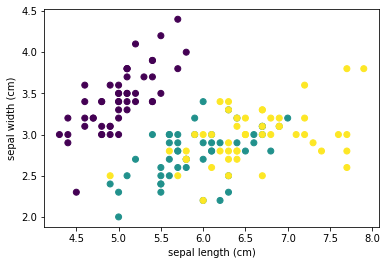

In [9]:
# Разделение набора данных
x_axis = iris_df.data[:, 0]  # Sepal Length
y_axis = iris_df.data[:, 1]  # Sepal Width

# Построение
plt.xlabel(iris_df.feature_names[0])
plt.ylabel(iris_df.feature_names[1])
plt.scatter(x_axis, y_axis, c=iris_df.target)
plt.show()

Отображённая выше точечная диаграмма построена для признаков:`sepal length`, `sepal width`. Фиолетовый цвет - вид `Sentosa`, зелёный `Versicolor`, желтый - `Virginica`.

#### Задание 1. 
Выполните построение точечной диаграммы для признаков `petal length`, `petal width`. Выполните построение точечной диаграммы для всех четырёх признаков. Сравните полученные диаграммы и напишите краткие выводы.

In [ ]:
#точечная диаграмма для признаков `petal length`, `petal width`
#ваш код здесь

In [ ]:
#точечная диаграмма для признаков `sepal length`, `sepal width`, `petal length`, `petal width`
#ваш код здесь

Краткие выводы

#### Алгоритм t-SNE (t-distributed stochastic neighbor embedding)

При отображении данных, вы использовали лишь пару признаков, которые есть у данных. Что делать чтобы отобразить данные, у которых большое количество признаков? Одним из способов явлется использование алгортима `TSNE` придуманного в 2008 году. С его помощью можно нарисовать данные любой размерности на двумерной плоскости так, чтобы их внутренняя структура сохранилась. 
Идею, реализованную в данном алгоритме, можно объяснить следующим образом. Представьте себе морожное из разноцветных шариков. Каждый цветной шарик это наше наблюдение в трёхмерном пространстве. Когда мы слепили шарик, какие-то из наблюдений сильно прилипли друг к другу, какие-то слабо. Где-то морожное подтаяло. Теперь давайте размахнёмся и кинем морожное в стенку. Его здорово расплющит, а шарики разлетятся по стене. При этом, если шарики были в большом комке сильно слиплены, они не разлетяться. Мы перевели наш трёхмерный шарик в двумерное пространство - стену.
В приведённом ниже примере, то, насколько сильно мы кидаем табличку в стену, регулирует параметр `perplexity`.

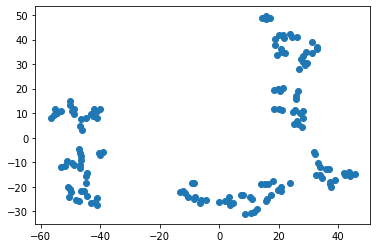

In [10]:
from sklearn.manifold import TSNE

# random state мы ставим, чтобы картинка каждый раз была одинаковой
# perplexity (спутанность) это наш заказ на силу броска
tsne = TSNE(random_state=10, perplexity=5)
tsne_representation = tsne.fit_transform(iris_df.data)
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1]);

### 1. Кластеризация методом k-средних

Алгоритм метода в общем виде рассмотрен на лекции. Первоначально выбирается желаемое количество кластеров. Поскольку нам известно, что в нашем наборе данных есть 3 класса, установим параметр модели n_clusters=3. Теперь случайным образом из входных данных выбираются три элемента выборки, в соответствие которым ставятся три кластера, в каждый из которых теперь включено по одной точке, каждая при этом является центроидом этого кластера.Далее ищем ближайшего соседа текущего центроида. Добавляем точку к соответствующему кластеру и пересчитываем положение центроида с учетом координат новых точек. Алгоритм заканчивает работу, когда координаты каждого центроида перестают меняться. Центроид каждого кластера в результате представляет собой набор значений признаков, описывающих усредненные параметры выделенных классов.

In [11]:
# Импортируем библиотеки
from sklearn import datasets
from sklearn.cluster import KMeans

# Загружаем набор данных
iris_df = datasets.load_iris()

# Описываем модель
model = KMeans(n_clusters=3)

# Проводим моделирование
model.fit(iris_df.data)

# Предсказание на единичном примере
predicted_label = model.predict([[7.2, 3.5, 0.8, 1.6]])

# Предсказание на всем наборе данных
all_predictions = model.predict(iris_df.data)

# Выводим предсказания
print(predicted_label)
print(all_predictions)

[1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [28]:
#Метоки кластеров
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

При выводе данных нужно понимать, что алгоритм не знает ничего о нумерации классов, и числа 0, 1, 2 – это лишь номера кластеров, определенных в результате работы алгоритма. Так как исходные точки выбираются случайным образом, вывод будет несколько меняться от одного запуска к другому. Попробуйте повторить запуск кода и вы увидите это.

Проанализируйте полученные результаты. Характерной особенностью набора данных ирисов Фишера является то, что один класс (Setosa) легко отделяется от двух остальных. Это заметно и в приведенном примере.

Отобразим результаты с помощью алгоритма `t-SNE`

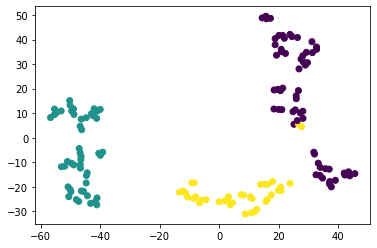

In [32]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1], 
            c=model.labels_);

Можно посмотреть, чем кластеры отличаются друг от друга

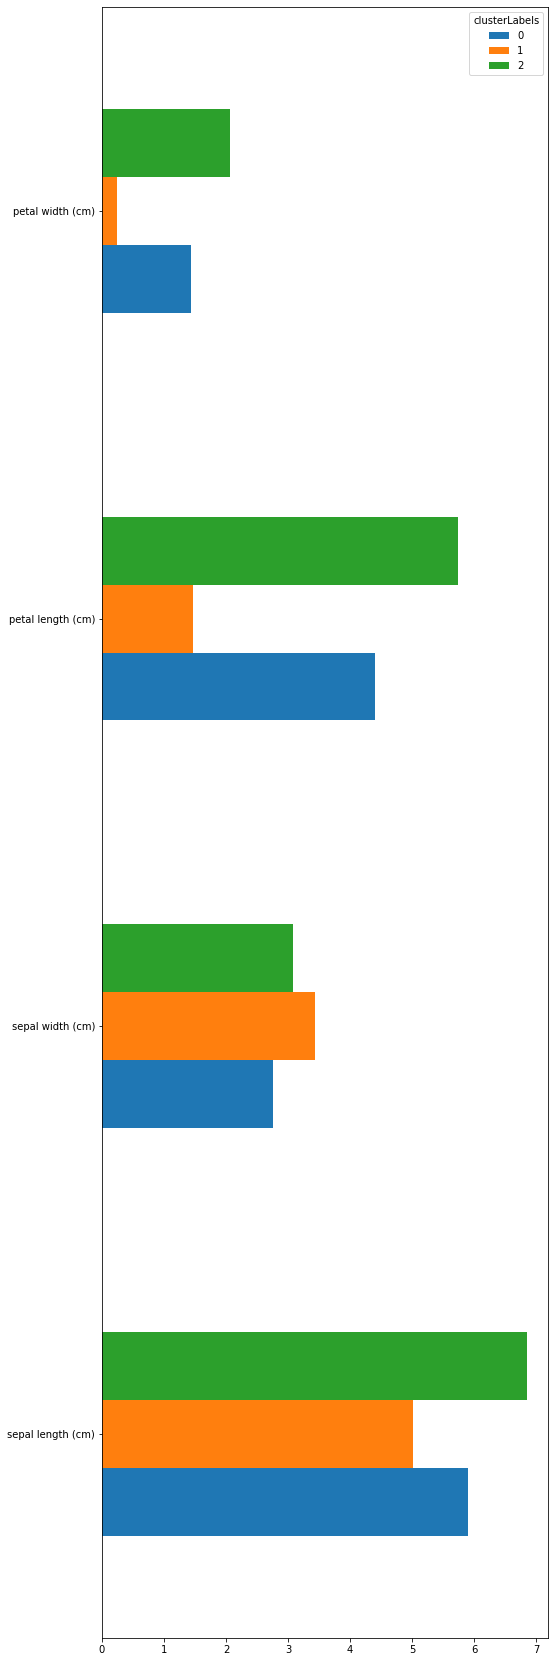

In [37]:
df_scaled = pd.DataFrame(iris_df.data)
df_scaled.columns = iris_df.feature_names

df_scaled['clusterLabels'] =model.labels_

# из-за того, что фичей много картинка окажется длиииинной :) 
df_scaled.groupby('clusterLabels').mean().T.plot.barh(figsize=(8, 30));

### Подборка числа кластеров методом локтя

Нужно реализовать функцию, которая визуализирует уменьшение внутрикластерного расстояния и поможет выбрать оптимальное количество кластеров.

Что подается на вход функции: матрица признаков `(X)`, максимальное число кластеров `(max_clust)`
Результат работы функции: рисуется картинка. По оси `x` - число кластеров, по оси `y` - соответствующее внутрикластерное расстояние

C:\Users\burov\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


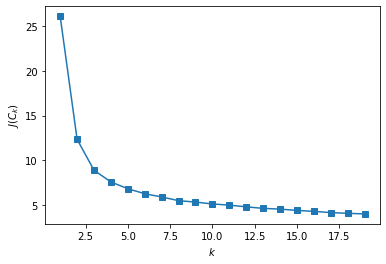

In [40]:
from sklearn.cluster import KMeans       # сама модель
from sklearn import metrics              # метрики
from scipy.spatial.distance import cdist # функция для рассчета расстояний между парами точек
import numpy as np
# будем искать оптимальное k
inertia = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(iris_df.data)
    inertia.append(np.sqrt(kmeans.inertia_))
plt.plot(range(1, 20), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');


#### Задание 2. 
Выполните кластеризацию с использованием различных трёх различных метрик. Для этого посмотрите описание метода `KMeans` библиотеки `Scikit-Learn`. Сравните результаты и напишите краткие выводы.

In [ ]:
#ваш код здесь

краткие выводы

### 2. Иерархическая (агломеративная) кластеризация

In [42]:
# Импортируем библиотеки
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd

In [43]:
# Загружаем набор данных
iris_df = datasets.load_iris()

In [44]:
mergings = linkage(iris_df.data, method='complete')

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [10.0, 10.0, 32.5, 32.5],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [85.0, 85.0, 95.0, 95.0],
  [105.0, 105.0, 115.0, 115.0],
  [90.0, 90.0, 110.0, 110.0],
  [62.5, 62.5, 100.0, 100.0],
  [21.25, 21.25, 81.25, 81.25],
  [125.0, 125.0, 135.0, 135.0],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [130.0, 130.0, 152.5, 152.5],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [141.25, 141.25, 182.5, 182.5],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [235.0, 235.0, 245.0, 245.0],
  [255.0, 255.0, 265.0, 265.0],
  [240.0, 240.0, 260.0, 260.0],
  [212.5, 212.5, 250.0, 250.0],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [325.0, 325.0, 335.0, 335.0],
  [315.0, 315.0, 330.0, 330.0],
  [292.5, 292.5, 322.5, 322.5],
  [275.0, 275.0, 307.5, 307.5],
  [231.25, 231.25, 291.25, 291.25],
  [161.875, 161.875, 261.2

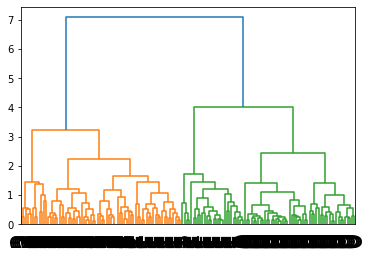

In [52]:
# Строим дендрограмму, указав параметры удобные для отображения
dendrogram(mergings,
           labels=iris_df.target,
           leaf_rotation=90,
           leaf_font_size=26,
           )

Как видите, при большом наборе данных, иерархическая кластеризаци не совсем удобна для отображения данных, но она позволяет не задавать количество кластеров. 

Иерархическая кластеризация хуже подходит для кластеризации больших объемов данных в сравнении с методом k-средних. Это объясняется тем, что временная сложность алгоритма линейна для метода k-средних (O(n)) и квадратична для метода иерархической кластеризации (O(n2))

Рассмотрим ещё один пример, на меньшем количестве данных. В приведённом ниже примере, осуществлена кластеризация датасета для различного вида зерна.

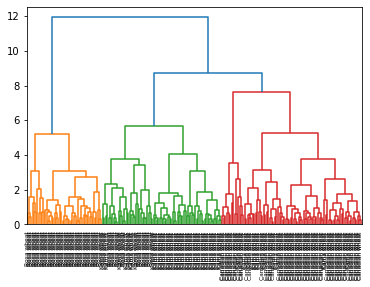

In [15]:
# Импортируем библиотеки
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd

# Создаем датафрейм
seeds_df = pd.read_csv("seeds.csv")
# Исключаем информацию об образцах зерна, сохраняем для дальнейшего использования
varieties = list(seeds_df.pop('grain_variety'))

# Извлекаем измерения как массив NumPy
samples = seeds_df.values

# Реализация иерархической кластеризации при помощи функции linkage
mergings = linkage(samples, method='complete')

# Строим дендрограмму, указав параметры удобные для отображения
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
           )

plt.show()

### Задание. Реализовать иерархическую кластеризацию для данного примера используя другие меры близости (параметр method)